In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
from sklearn.metrics import f1_score
# Package to implement ML Algorithms
import sklearn
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import RandomForestClassifier
# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor
from sklearn.metrics import accuracy_score
# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package for data partitioning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from pprint import pprint

In [2]:
# Load dataset as dataframe
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
X = df.drop(columns = ['fetal_health'])
y = df['fetal_health']

In [4]:
X_encoded = pd.get_dummies(X)
X_encoded.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [5]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

In [6]:
reg = RandomForestClassifier(random_state = 42)

In [7]:
# Fit the model
start = time.time()            # Start Time
reg.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.276752233505249s


In [8]:
# Predict Test Set
y_pred = reg.predict(test_X)

# Evaluate the model on test set
r2 = sklearn.metrics.r2_score(test_y, y_pred)
print('R-squared on Test Set: %0.2f' %r2)

RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
print('RMSE on Test Set: %0.2f' %RMSE_test)

R-squared on Test Set: 0.80
RMSE on Test Set: 0.26


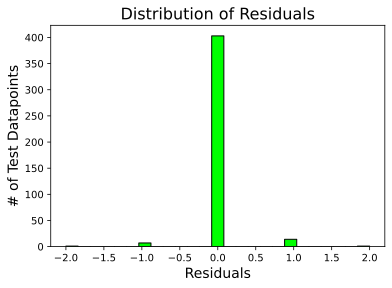

In [9]:
# Calculate the residuals by subtracting the predicted values from the actual test values
all_residuals = test_y - y_pred

# Set up the figure with custom size and resolution (DPI)
plt.figure(figsize=(6, 4), dpi = 150)

# Plot the histogram of residuals
plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# Label X and Y axes
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('# of Test Datapoints', fontsize = 14)

# Set the title of the plot
plt.title('Distribution of Residuals', fontsize = 16)

# Adjust the font size of x and y ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

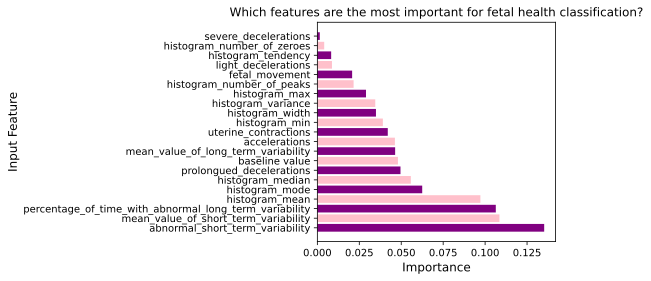

In [10]:
# Storing importance values from the trained model
importance = reg.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(8, 4))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for fetal health classification?', fontsize = 12) 
plt.yticks(fontsize = 10) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();

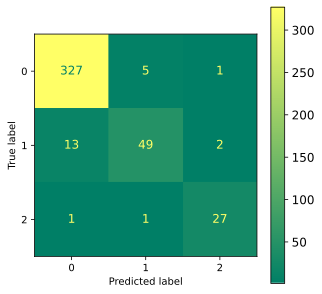

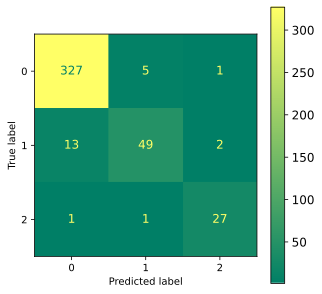

In [11]:
y_pred = reg.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'summer', ax = ax);
fig

In [12]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df.to_csv('FH_RF_CR.csv') 

In [13]:
rf_pickle = open('random_forest_FHealth.pickle', 'wb') 

# Write DT model to the file
pickle.dump(reg, rf_pickle) 

# Close the file
rf_pickle.close() 

In [14]:
#START OF DECISION TREE
clf = DecisionTreeClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=0)

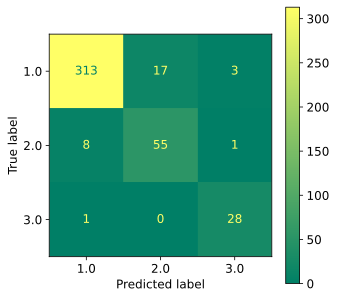

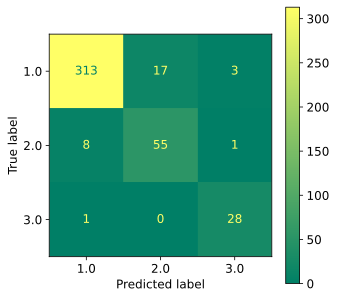

In [15]:
# Predictions on test set
y_predDT = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_predDT, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'summer', ax = ax);
fig

In [16]:
report2 = classification_report(test_y, y_predDT, output_dict = True)
report_df2 = pd.DataFrame(report2)
report_df2.to_csv('FH_DT_CR.csv')

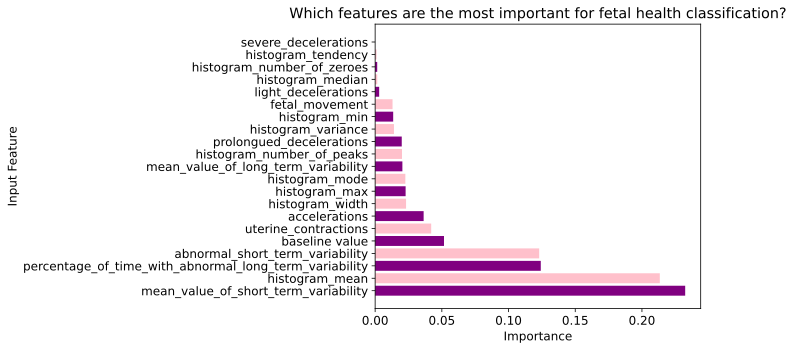

In [17]:
# Storing importance values from the trained model
importance2 = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp2 = pd.DataFrame(list(zip(train_X.columns, importance2)),
               columns = ['Feature', 'Importance'])

feature_imp2 = feature_imp2.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp2['Feature'], feature_imp2['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health classification?') 
plt.tight_layout()
plt.savefig("feature_imp.svg");

In [18]:
dt_pickle = open('decision_tree_FHealth.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 

In [19]:
#START OF ADABOOST
ada = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

In [20]:
# Start with an initial guess for parameters
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

pprint(random_grid)

{'learning_rate': [0.1,
                   0.2,
                   0.30000000000000004,
                   0.4,
                   0.5,
                   0.6,
                   0.7000000000000001,
                   0.8,
                   0.9,
                   1.0,
                   1.1,
                   1.2000000000000002,
                   1.3000000000000003,
                   1.4000000000000001,
                   1.5000000000000002,
                   1.6,
                   1.7000000000000002,
                   1.8000000000000003,
                   1.9000000000000001,
                   2.0],
 'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500]}


In [21]:
# Creating stratified folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [22]:
# Call RandomizedSearchCV()
random_cv = RandomizedSearchCV(estimator = ada,
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs

In [23]:
# Fit the model
start = time.time()            # Start Time
random_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training time: 61.34042239189148s


In [24]:
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)

Initial score:  0.8569191468319932
Initial parameters:  {'n_estimators': 335, 'learning_rate': 0.7000000000000001}


In [25]:
# Create the parameter grid based on the results of random search
param_grid = {'n_estimators': [315, 320, 325, 330, 335, 340],
              'learning_rate': [0.65, 0.7, 0.75]
}

pprint(param_grid)

{'learning_rate': [0.65, 0.7, 0.75],
 'n_estimators': [315, 320, 325, 330, 335, 340]}


In [26]:
# Call GridSearchCV()
grid_cv = GridSearchCV(estimator = ada,
                        param_grid = param_grid,
                        scoring= 'f1_macro',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) # Will utilize all available CPUs

In [27]:
# Fit the model
start = time.time()            # Start Time
grid_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training time: 14.663318634033203s


In [28]:
print('Improved score: ', grid_cv.best_score_)
print('Improved parameters: ', grid_cv.best_params_)

Improved score:  0.8569191468319932
Improved parameters:  {'learning_rate': 0.7, 'n_estimators': 335}


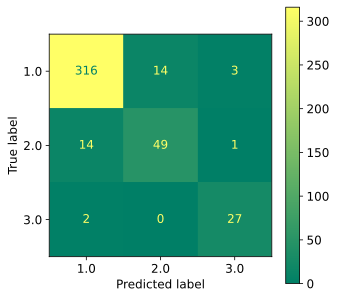

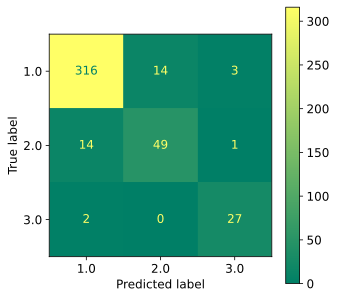

In [29]:
# Predictions on test set
y_predADA = grid_cv.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_predADA, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'summer', ax = ax);
fig

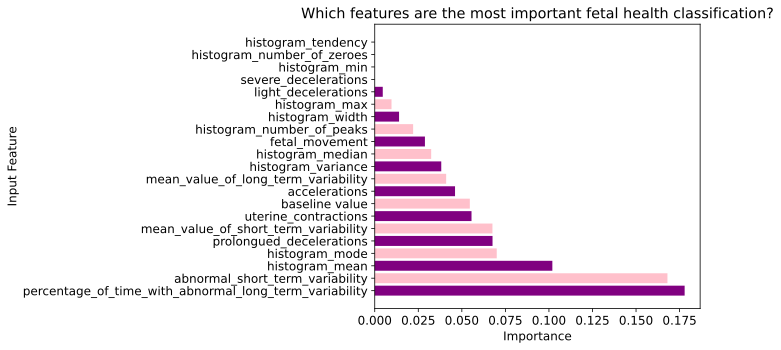

In [30]:
# Storing importance values from the trained model
importance3 = grid_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp3 = pd.DataFrame(list(zip(train_X.columns, importance3)),
               columns = ['Feature', 'Importance'])

feature_imp3 = feature_imp3.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp3['Feature'], feature_imp3['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important fetal health classification?') 
plt.tight_layout()
plt.savefig("feature_imp.svg");

In [31]:
report3 = classification_report(test_y, y_predADA, output_dict = True)
report_df3 = pd.DataFrame(report3)
report_df3.to_csv('FH_ADA_CR.csv') 

In [32]:
ada_pickle = open('ada_FHealth.pickle', 'wb') 

# Write DT model to the file
pickle.dump(grid_cv, ada_pickle) 

# Close the file
ada_pickle.close() 

In [33]:
soft_voting_clf = VotingClassifier(estimators = [('rf', reg), ('dt', clf), ('ada', grid_cv)],
                                   voting = 'soft', 
                                   n_jobs = -1)

soft_voting_clf.fit(train_X, train_y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=0)),
                             ('ada',
                              GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                                           estimator=AdaBoostClassifier(algorithm='SAMME',
                                                                        random_state=42),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.65,
                                                                         0.7,
                                                                         0.75],
                                                       'n_estimators': [315,
                                                                        320,
                                                                        325,
                                                                        330,
                                                                        335,
                                                                        340]},
                                           scoring='f1_macro', verbose=1))],
                 n_jobs=-1, voting='soft')

In [34]:
for xx in (reg, clf, grid_cv, soft_voting_clf):
    xx.fit(train_X, train_y)
    y_pred = xx.predict(test_X)
    print(xx.__class__.__name__, f1_score(test_y, y_pred, average = 'macro'))

RandomForestClassifier 0.9030366861827966
DecisionTreeClassifier 0.8941938357122351
Fitting 5 folds for each of 18 candidates, totalling 90 fits
GridSearchCV 0.8740098277189036
VotingClassifier 0.8941938357122351


In [35]:
Nsoft_voting_clf= VotingClassifier(estimators = [('rf', reg), ('dt', clf), ('ada', grid_cv)],
                                   voting = 'soft', 
                                   n_jobs = -1,
                                   weights=[0.338,0.335,0.327])

Nsoft_voting_clf.fit(train_X, train_y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=0)),
                             ('ada',
                              GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                                           estimator=AdaBoostClassifier(algorithm='SAMME',
                                                                        random_state=42),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.65,
                                                                         0.7,
                                                                         0.75],
                                                       'n_estimators': [315,
                                                                        320,
                                                                        325,
                                                                        330,
                                                                        335,
                                                                        340]},
                                           scoring='f1_macro', verbose=1))],
                 n_jobs=-1, voting='soft', weights=[0.338, 0.335, 0.327])

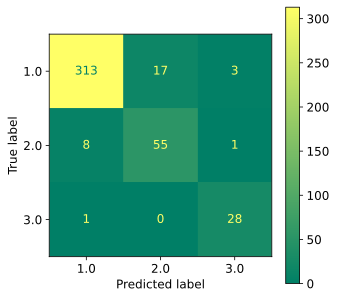

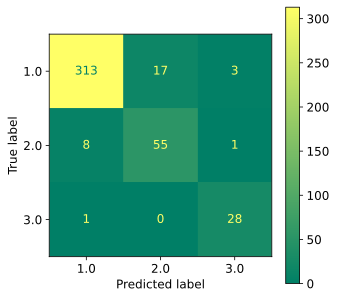

In [36]:
y_predSV = Nsoft_voting_clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_predSV, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'summer', ax = ax);
fig

In [37]:
#USED CHATGPT TO HELP WITH THIS BLOCK OF CODE (CODE SYNTAX ASSISTANCE)
df2_grouped = feature_imp.groupby('Feature', as_index=False)['Importance'].sum()
merged_df = pd.merge(feature_imp, feature_imp2, on='Feature', how='left')
merged_df2 = pd.merge(merged_df, feature_imp3, on='Feature', how='left')
merged_df2['FI'] = merged_df2['Importance_x'] + merged_df2['Importance_y'] + merged_df2['Importance']
merged_df2 = merged_df2.sort_values('FI', ascending = False).reset_index(drop = True)

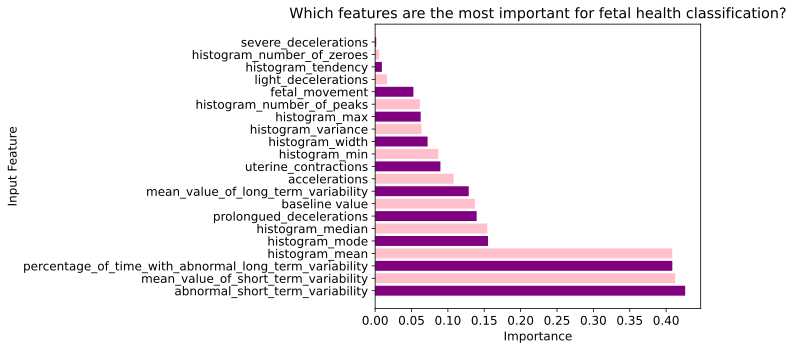

In [38]:

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], merged_df2['FI'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health classification?') 
plt.tight_layout()
plt.savefig("feature_imp.svg");

In [39]:
report4 = classification_report(test_y, y_predSV, output_dict = True)
report_df4 = pd.DataFrame(report4)
report_df4.to_csv('FH_SV_CR.csv') 

In [40]:
sv_pickle = open('sv_FHealth.pickle', 'wb') 

# Write DT model to the file
pickle.dump(Nsoft_voting_clf, sv_pickle) 

# Close the file
sv_pickle.close() 